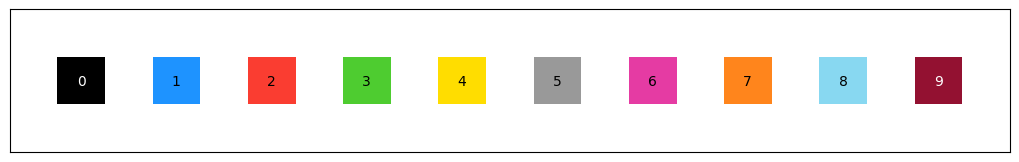

In [1]:
import sys
sys.path.append("./kaggle/input/google-code-golf-2025/code_golf_utils")
from code_golf_utils import *
show_legend()

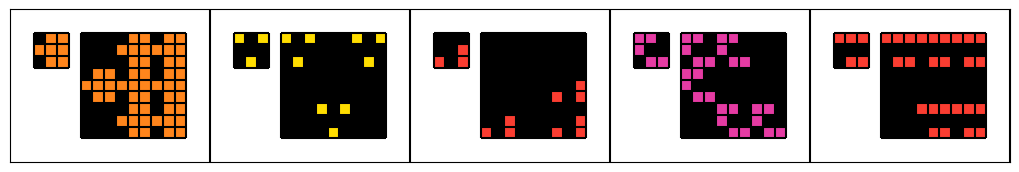

In [2]:
# Examples
show_examples(load_examples(1)['train'])

In [ ]:
# Submission Compression
import zlib
import zipfile
import zopfli.zlib
from tqdm import tqdm
from zipfile import ZipFile

#https://www.kaggle.com/code/cheeseexports/big-zippa
def zip_src(src_code):
    compressed_options = []
    for compress in [zopfli.zlib.compress, lambda data: zlib.compress(data, 9)]:
        for trailing in [b"", b"\n"]:
            src = src_code + trailing
            # We prefer that compressed source not end in a quotation mark
            while (compressed := compress(src))[-1] == ord('"'):
                src += b"#"

            def sanitize(b_in):
                """Clean up problematic bytes in compressed b-string"""
                b_out = bytearray()
                for b in b_in:
                    if b == 0:
                        b_out += b"\\x00"
                    elif b == ord("\r"):
                        b_out += b"\\r"
                    elif b == ord("\\"):
                        b_out += b"\\\\"
                    else:
                        b_out.append(b)
                return b"" + b_out

            compressed = sanitize(compressed)
            delim = b'"'
            if ord("\n") in compressed:
                delim = b'"""'
            elif ord('"') in compressed:
                delim = b"'"
            compressed_options.append(
                b"#coding:L1\nimport zlib\nexec(zlib.decompress(bytes("
                + delim
                + compressed
                + delim
                + b',"L1")))'
            )
    return min(compressed_options, key=lambda x: len(x))

files = {}
total_save=0
input_dir = "./kaggle/original"
output_dir = "./kaggle/submission"

In [17]:
total_save = 0
score = 0

for task_index in range(1, 401):
    original_src = open(f'{input_dir}/task' + str(task_index).zfill(3) + '.py','rb').read().strip()
    zipped_src = zip_src(original_src)
    improvement = len(original_src) - len(zipped_src)
    
    if improvement > 0:
        total_save += improvement
        open(f'{output_dir}/task' + str(task_index).zfill(3) + '.py','wb').write(zipped_src)
        score += max(1, 2500-len(zipped_src))
    else:
        open(f'{output_dir}/task' + str(task_index).zfill(3) + '.py','wb').write(original_src)
        score += max(1, 2500-len(original_src))
        
    
print("Total Compression Save: ", total_save)
print("Total Score: ", score)

Total Compression Save:  62904
Total Score:  886841
